In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load Dataset
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [19]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.shape

(5572, 2)

In [4]:
# Drop empty columns
cols = [2, 3, 4]
df.drop(df.columns[cols], axis=1, inplace=True)

In [5]:
# Rename columns as category and message
df.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)

In [6]:
# Print dataset information
print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5572 E-Mails.


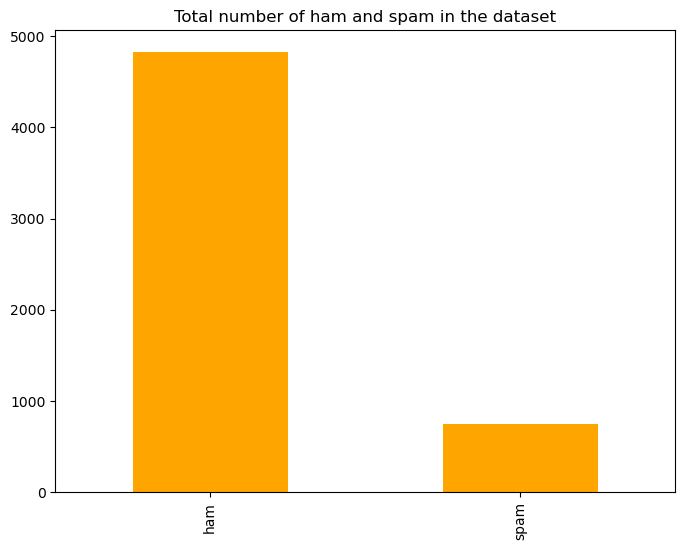

In [7]:
# Plotting the distribution of categories
plt.figure(figsize=(8, 6))
df['Category'].value_counts().plot.bar(color=["orange", "orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

In [10]:
# Convert Category to numerical values: 0 for ham, 1 for spam
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [11]:
# Split the dataset into features and target variable
X = df['Message']
Y = df['Category']

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [13]:
# Define Naive Bayes model pipeline
clf_NaiveBayes = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])


In [14]:
# Fit the model
clf_NaiveBayes.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [15]:
# Make predictions on the test set
y_pred_NB = clf_NaiveBayes.predict(X_test)

In [16]:
# Calculate accuracy
naive_acc = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy of Naive Bayes: {naive_acc:.4f}')

Accuracy of Naive Bayes: 0.9821


In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[1448    5]
 [  25  194]]


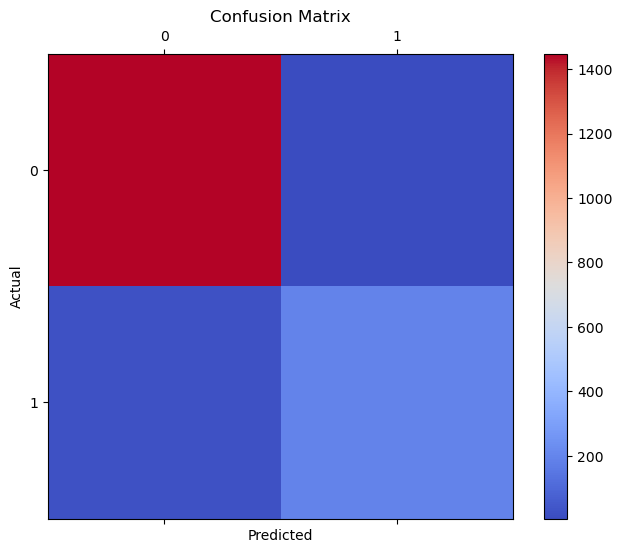

In [18]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap='coolwarm', fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
# Classification report
report = classification_report(y_test, y_pred_NB, target_names=['Ham', 'Spam'])
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99      1453
        Spam       0.97      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

